# Load Data from Kaggle

In [4]:
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 3.3MB/s 
     |████████████████████████████████| 5.3MB 8.9MB/s 
     |████████████████████████████████| 133kB 41.7MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 112kB 49.3MB/s 


In [5]:
# Upload the kaggle.json from Kaggle -> My Account -> Create New API Token
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
for file_name in uploaded.keys():
  print(file_name)

kaggle.json


In [7]:
!mkdir -p ~/.kaggle

In [8]:
!cp kaggle.json ~/.kaggle/

In [9]:
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!ls ~/.kaggle

kaggle.json


In [11]:
!ls -l ~/.kaggle

total 4
-rw------- 1 root root 67 Aug 14 19:04 kaggle.json


In [12]:
!cat ~/.kaggle/kaggle.json

{"username":"nabanitaroy","key":"57246a6cabb73b7f6353a1caf30a96cb"}

In [18]:
!kaggle datasets list -h

usage: kaggle datasets list [-h] [--sort-by SORT_BY] [--size SIZE]
                            [--file-type FILE_TYPE] [--license LICENSE_NAME]
                            [--tags TAG_IDS] [-s SEARCH] [-m] [--user USER]
                            [-p PAGE] [-v]

optional arguments:
  -h, --help            show this help message and exit
  --sort-by SORT_BY     Sort list results. Default is 'hottest'. Valid options are 'hottest', 'votes', 'updated', and 'active'
  --size SIZE           Search for datasets of a specific size. Default is 'all'. Valid options are 'all', 'small', 'medium', and 'large'
  --file-type FILE_TYPE
                        Search for datasets with a specific file type. Default is 'all'. Valid options are 'all', 'csv', 'sqlite', 'json', and 'bigQuery'. Please note that bigQuery datasets cannot be downloaded
  --license LICENSE_NAME
                        Search for datasets with a specific license. Default is 'all'. Valid options are 'all', 'cc', 'gpl', 'odb', and

In [23]:
!kaggle datasets list -s hsankesara/flickr-image-dataset

ref                              title                 size  lastUpdated          downloadCount  
-------------------------------  --------------------  ----  -------------------  -------------  
hsankesara/flickr-image-dataset  Flickr Image dataset   8GB  2018-06-12 20:34:20           8267  
greenahn/flickrproc              flickr-proc            2GB  2019-06-21 09:07:30             15  


In [36]:
!kaggle datasets download hsankesara/flickr-image-dataset -p /dataset

100% 8.16G/8.16G [02:06<00:00, 79.1MB/s]
100% 8.16G/8.16G [02:06<00:00, 69.3MB/s]


In [37]:
!ls -a

.  ..  .config	installments_payments.csv.zip  kaggle.json  sample_data


In [38]:
!ls /dataset

flickr-image-dataset.zip


In [39]:
!unzip /dataset/*.zip

Streaming output truncated to the last 5000 lines.
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535529555.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356236664.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5356318668.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/535830521.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5359437945.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361355399.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/53614287.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536147209.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5361551308.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/536156200.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/5362687336.jpg  
  inflating: flickr30k_images/flickr30k_images/flickr30k_images/

In [43]:
!ls

flickr30k_images  installments_payments.csv.zip  kaggle.json  sample_data


In [47]:
!ls flickr30k_images

flickr30k_images  results.csv


The flickr30k_images folder contains the images. The results.csv are the list of captions per image file name.

# Load the Captions Data

In [114]:
import pandas as pd
df = pd.read_csv('flickr30k_images/results.csv', sep='|')
df.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [116]:
df.shape

(158915, 3)

In [117]:
df.head()

,image_name,comment_number,comment
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1,"Two young , White males are outside near many..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .
4,1000092795.jpg,4,Two friends enjoy time spent together .


In [118]:
df.columns

Index(['image_name', ' comment_number', ' comment'], dtype='object')

In [119]:
clean_cols = []
for col in df.columns:
    if ' ' in col:
        col = col.strip()
    clean_cols.append(col)
df.columns = clean_cols
df.columns

Index(['image_name', 'comment_number', 'comment'], dtype='object')

In [120]:
df.comment_number.value_counts()

 0                                    31783
 1                                    31783
 2                                    31783
 3                                    31783
 4                                    31782
 4   A dog runs across the grass .        1
Name: comment_number, dtype: int64

In [121]:
df[df.comment_number.str.contains('4   A dog runs across the grass .')]

,image_name,comment_number,comment
19999,2199200615.jpg,4 A dog runs across the grass .,NaN


In [122]:
df.iloc[19999,2] = 'A dog runs across the grass .'
df.iloc[19999,1] = 4

In [123]:
df[df.image_name == '2199200615.jpg']

,image_name,comment_number,comment
19995,2199200615.jpg,0,A dog running on green grass with its mouth o...
19996,2199200615.jpg,1,a white dog is running with its mouth open ac...
19997,2199200615.jpg,2,"A white , black , and brown dog runs in a fie..."
19998,2199200615.jpg,3,A dog runs across the grassy field .
19999,2199200615.jpg,4,A dog runs across the grass .


In [124]:
df.comment_number.value_counts()

 0    31783
 1    31783
 2    31783
 3    31783
 4    31782
4         1
Name: comment_number, dtype: int64

In [125]:
df['comment_number'] = df.comment_number.astype(int)


In [126]:
df.comment_number.value_counts()

4    31783
3    31783
2    31783
1    31783
0    31783
Name: comment_number, dtype: int64

# Image EDA

In [127]:
image_data_path = 'flickr30k_images/flickr30k_images/'

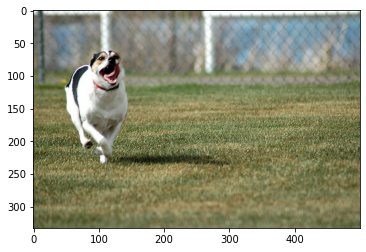

In [128]:
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
image_load = load_img(image_data_path + "2199200615.jpg")
plt.imshow(image_load)

# Texts Cleaning

In [129]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [130]:
import string

def clean_captions(x):
  clean_caption_text = []
  for token in nlp(x.strip().lower()):
    if token.text in string.punctuation or len(token.text) <= 1 or not token.text.isalpha():
      continue
    # print(token)
    clean_caption_text.append(token.text)
  return clean_caption_text


In [149]:
df['tokenized_captions'] = df['comment'].apply(lambda x: clean_captions(x))

In [151]:
df.head()

,image_name,comment_number,comment,tokenized_captions,cleaned_image_name,lstm_input
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...,"[two, young, guys, with, shaggy, hair, look, a...",1000092795,None
1,1000092795.jpg,1,"Two young , White males are outside near many...","[two, young, white, males, are, outside, near,...",1000092795,NaN
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .,"[two, men, in, green, shirts, are, standing, i...",1000092795,NaN
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .,"[man, in, blue, shirt, standing, in, garden]",1000092795,NaN
4,1000092795.jpg,4,Two friends enjoy time spent together .,"[two, friends, enjoy, time, spent, together]",1000092795,NaN


In [133]:
df['cleaned_image_name'] = df.image_name.str.split('.',  expand=True)[0]

In [134]:
df.head()

,image_name,comment_number,comment,tokenized_captions,cleaned_image_name
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...,"[two, young, guys, with, shaggy, hair, look, a...",1000092795
1,1000092795.jpg,1,"Two young , White males are outside near many...","[two, young, white, males, are, outside, near,...",1000092795
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .,"[two, men, in, green, shirts, are, standing, i...",1000092795
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .,"[man, in, blue, shirt, standing, in, garden]",1000092795
4,1000092795.jpg,4,Two friends enjoy time spent together .,"[two, friends, enjoy, time, spent, together]",1000092795


# Build LSTM

In [154]:
df['lstm_input'] = df['tokenized_captions'].apply(lambda x: ['startseq'] + x +['endseq'])

In [155]:
df.head()

,image_name,comment_number,comment,tokenized_captions,cleaned_image_name,lstm_input
0,1000092795.jpg,0,Two young guys with shaggy hair look at their...,"[two, young, guys, with, shaggy, hair, look, a...",1000092795,"[startseq, two, young, guys, with, shaggy, hai..."
1,1000092795.jpg,1,"Two young , White males are outside near many...","[two, young, white, males, are, outside, near,...",1000092795,"[startseq, two, young, white, males, are, outs..."
2,1000092795.jpg,2,Two men in green shirts are standing in a yard .,"[two, men, in, green, shirts, are, standing, i...",1000092795,"[startseq, two, men, in, green, shirts, are, s..."
3,1000092795.jpg,3,A man in a blue shirt standing in a garden .,"[man, in, blue, shirt, standing, in, garden]",1000092795,"[startseq, man, in, blue, shirt, standing, in,..."
4,1000092795.jpg,4,Two friends enjoy time spent together .,"[two, friends, enjoy, time, spent, together]",1000092795,"[startseq, two, friends, enjoy, time, spent, t..."


In [156]:
df.to_pickle('df_captions_preprocessed1.pkl')

In [157]:
!ls

df_captions_preprocessed1.pkl  installments_payments.csv.zip  sample_data
flickr30k_images	       kaggle.json


In [158]:
files.download('df_captions_preprocessed1.pkl') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>